# Heart Disease EDA & Prediction

## Exploratory Data Analysis

### Importing Libraries and Data

In [1]:
# Importing Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

warnings.filterwarnings('ignore')
sns.set_style()

In [4]:
# Importing & Viewing Data
data = pd.read_csv('heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Understanding

In [5]:
data.shape

(1025, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [9]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Data Preprocessing

In [13]:
# Rename Columns

data.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain',
    'trestbps': 'Resting_BP',
    'chol': 'Cholestrol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Electrocardiographic',
    'thalach': 'Max_Heart_Rate',
    'exang': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slope': 'Slope',
    'ca': 'No_Major_Vessels',
    'thal': 'Thal',
    'target': 'Target'
}, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1025 non-null   int64  
 1   Sex                           1025 non-null   int64  
 2   Chest Pain                    1025 non-null   int64  
 3   Resting_BP                    1025 non-null   int64  
 4   Cholestrol                    1025 non-null   int64  
 5   Fasting_Blood_Sugar           1025 non-null   int64  
 6   Resting_Electrocardiographic  1025 non-null   int64  
 7   Max_Heart_Rate                1025 non-null   int64  
 8   Exercise_Induced_Angina       1025 non-null   int64  
 9   Old_Peak                      1025 non-null   float64
 10  Slope                         1025 non-null   int64  
 11  No_Major_Vessels              1025 non-null   int64  
 12  Thal                          1025 non-null   int64  
 13  Tar

### Data Transformation

In [15]:
df = data.copy()

In [16]:
df.replace({'Sex': {0: 'Female', 1: 'Male'}}, inplace=True)

In [17]:
df.replace({'Target': {0: 'Clean', 1:'Disease'}}, inplace=True)

### Data Visualization

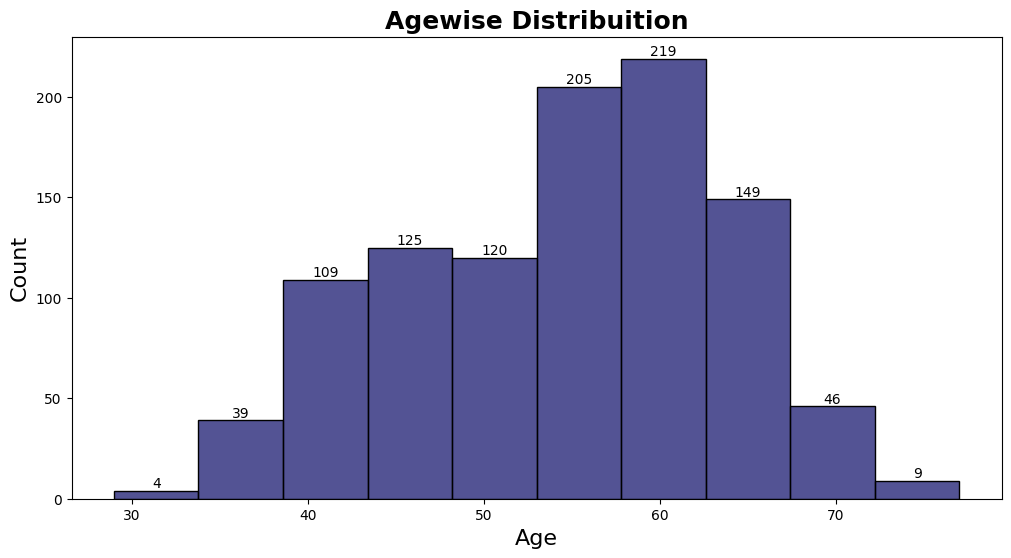

In [18]:
plt.figure(figsize=(12,6))
plt.title('Agewise Distribuition', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Age'], bins=10, color='midnightblue')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

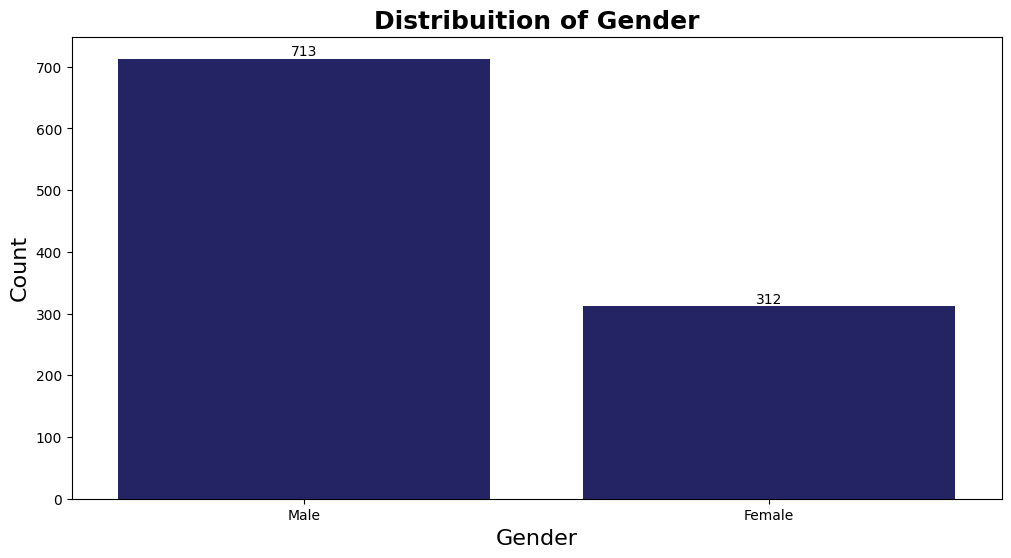

In [19]:
plt.figure(figsize=(12,6))
plt.title('Distribuition of Gender', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df['Sex'], color='midnightblue')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

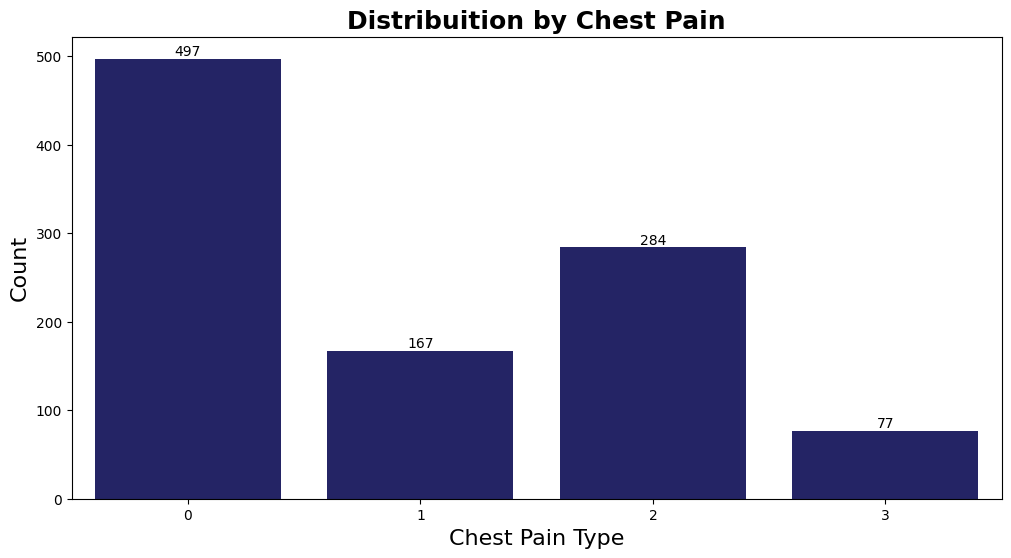

In [20]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Chest Pain', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Chest Pain'].value_counts().index, y=df['Chest Pain'].value_counts().values, color='midnightblue')
plt.xlabel('Chest Pain Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

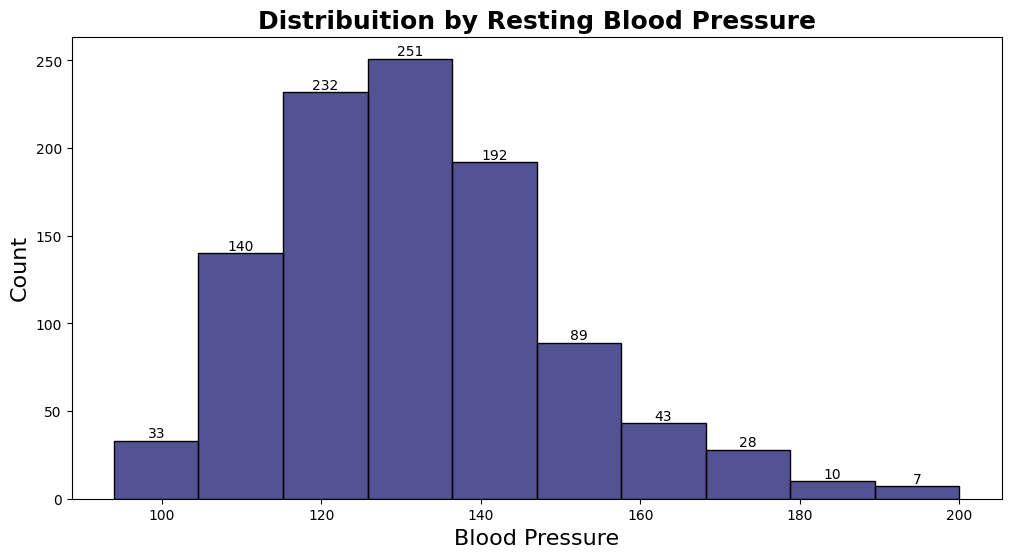

In [21]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Resting Blood Pressure', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Resting_BP'], bins=10, color='midnightblue')
plt.xlabel('Blood Pressure', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

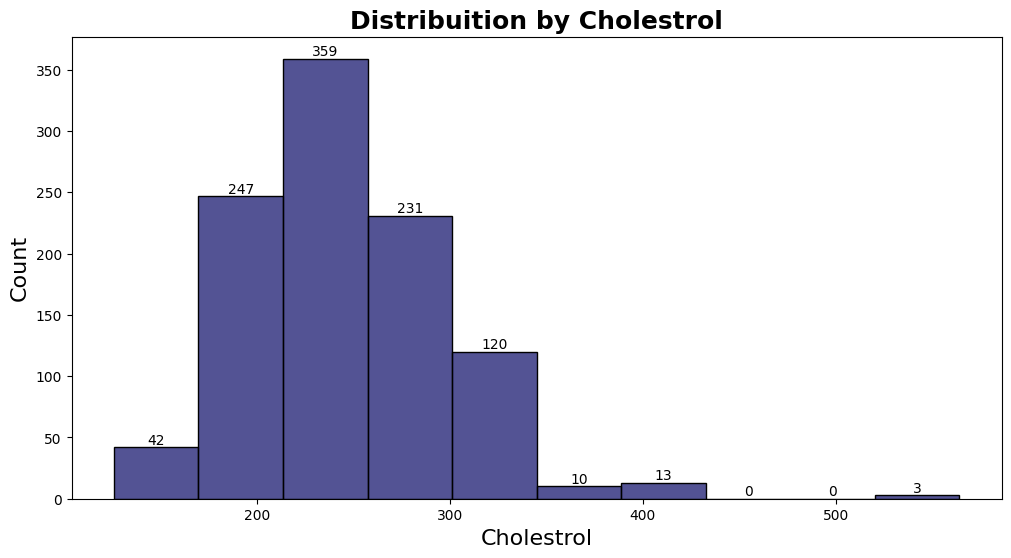

In [22]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Cholestrol', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Cholestrol'], bins=10, color='midnightblue')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

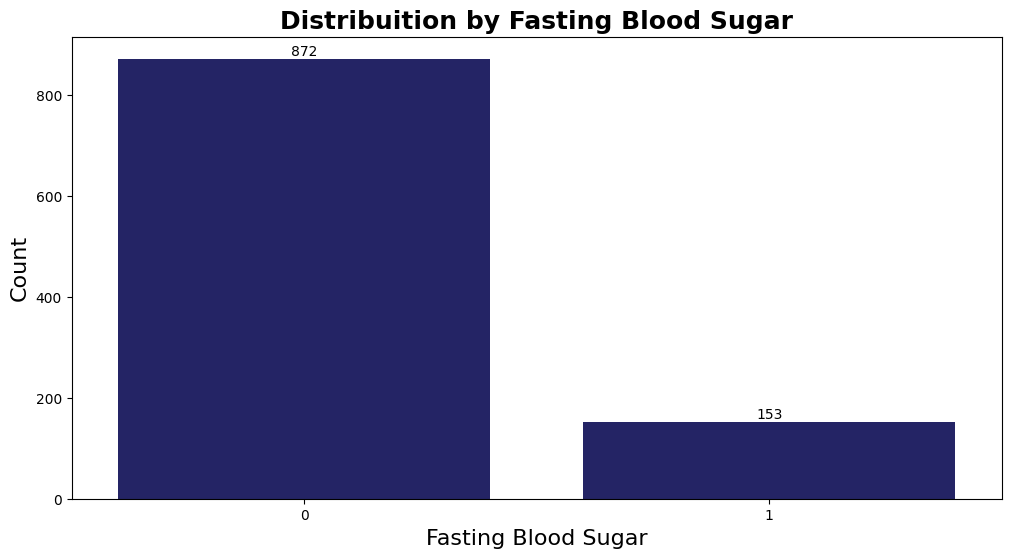

In [23]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Fasting Blood Sugar', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Fasting_Blood_Sugar'].value_counts().index, y=df['Fasting_Blood_Sugar'].value_counts().values, color='midnightblue')
plt.xlabel('Fasting Blood Sugar', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

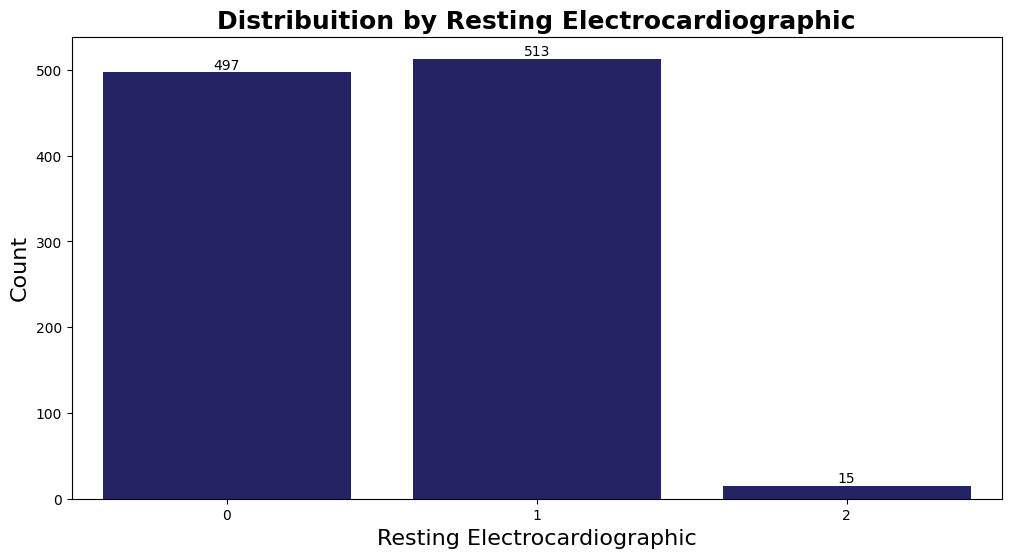

In [24]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Resting Electrocardiographic', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Resting_Electrocardiographic'].value_counts().index, y=df['Resting_Electrocardiographic'].value_counts().values, color='midnightblue')
plt.xlabel('Resting Electrocardiographic', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

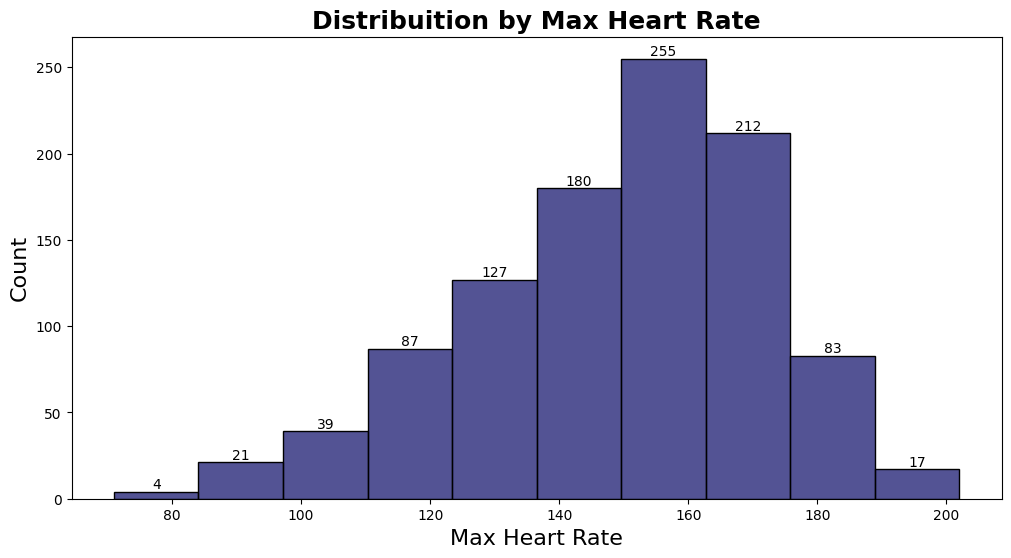

In [25]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Max Heart Rate', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Max_Heart_Rate'], bins=10, color='midnightblue')
plt.xlabel('Max Heart Rate', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

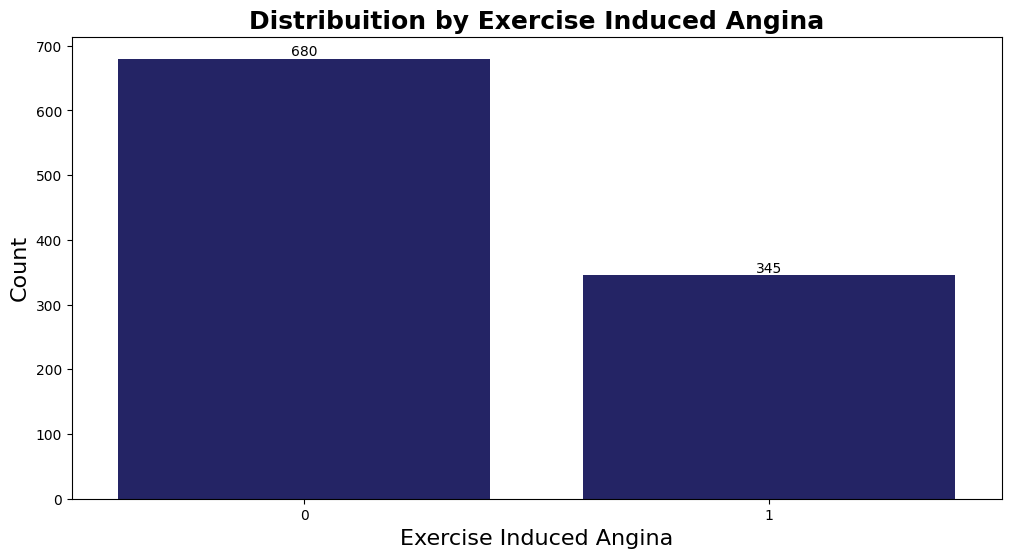

In [26]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Exercise Induced Angina', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Exercise_Induced_Angina'].value_counts().index, y=df['Exercise_Induced_Angina'].value_counts().values, color='midnightblue')
plt.xlabel('Exercise Induced Angina', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

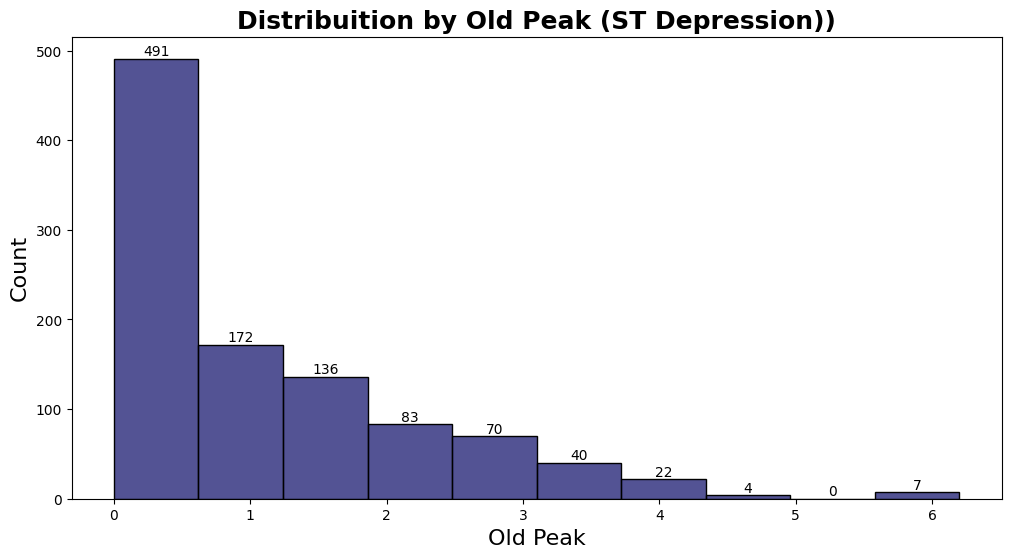

In [27]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Old Peak (ST Depression))', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Old_Peak'], bins=10, color='midnightblue')
plt.xlabel('Old Peak', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

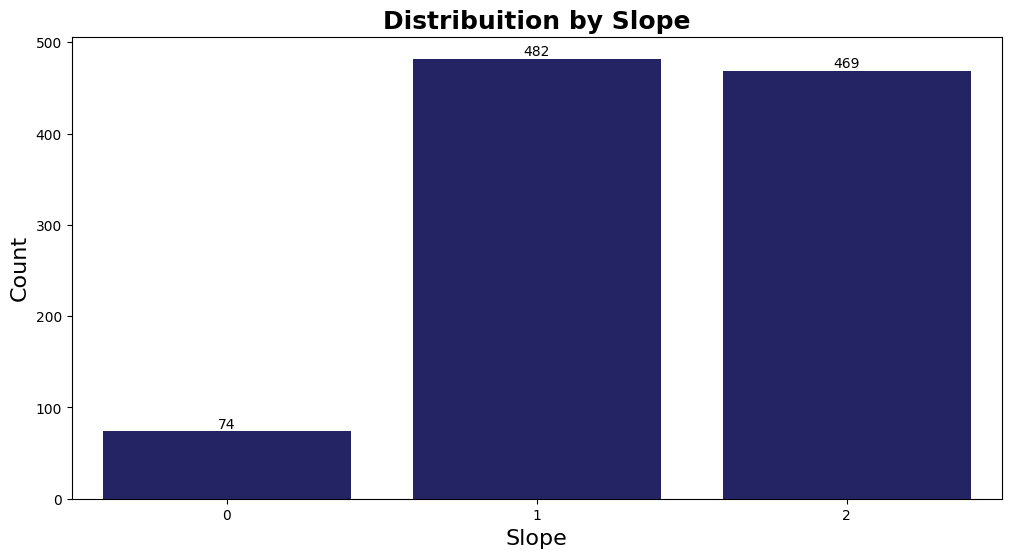

In [28]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Slope', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Slope'].value_counts().index, y=df['Slope'].value_counts().values, color='midnightblue')
plt.xlabel('Slope', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

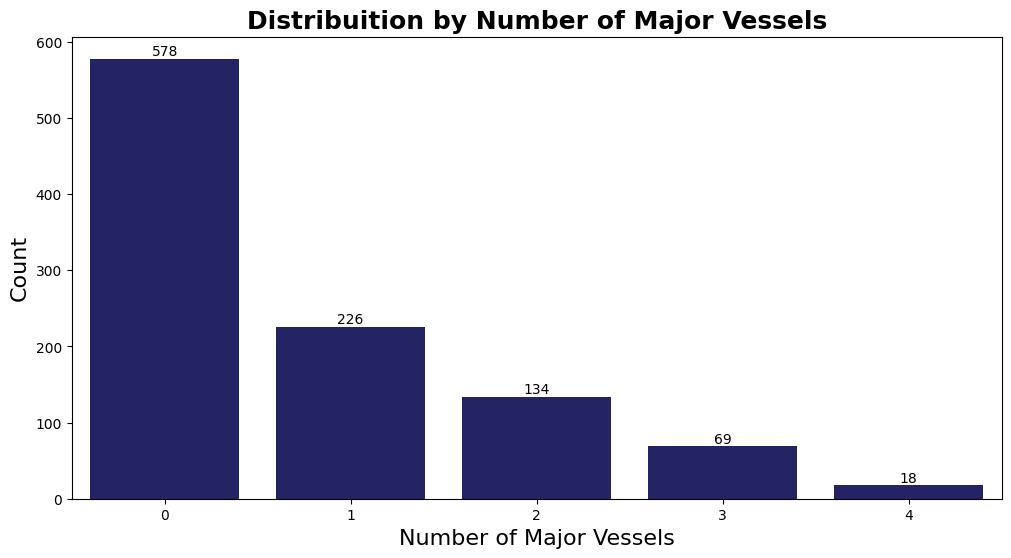

In [29]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Number of Major Vessels', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['No_Major_Vessels'].value_counts().index, y=df['No_Major_Vessels'].value_counts().values, color='midnightblue')
plt.xlabel('Number of Major Vessels', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

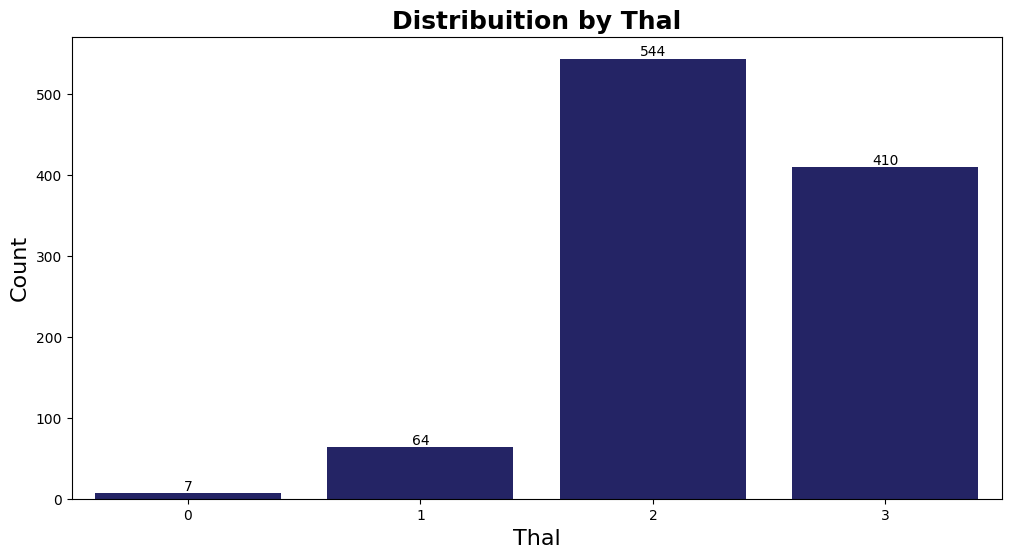

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Thal', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Thal'].value_counts().index, y=df['Thal'].value_counts().values, color='midnightblue')
plt.xlabel('Thal', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

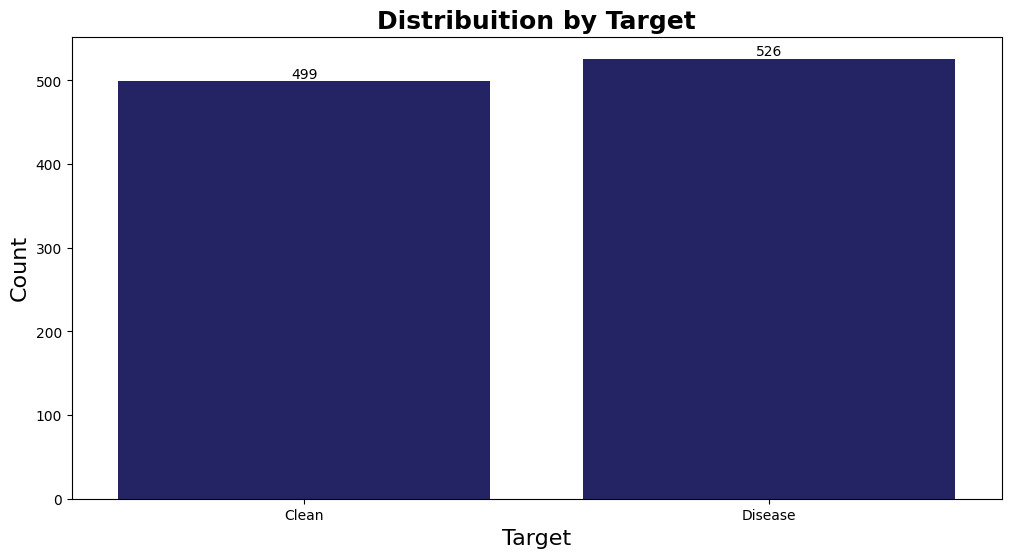

In [31]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Target', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df['Target'], color='midnightblue')
plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

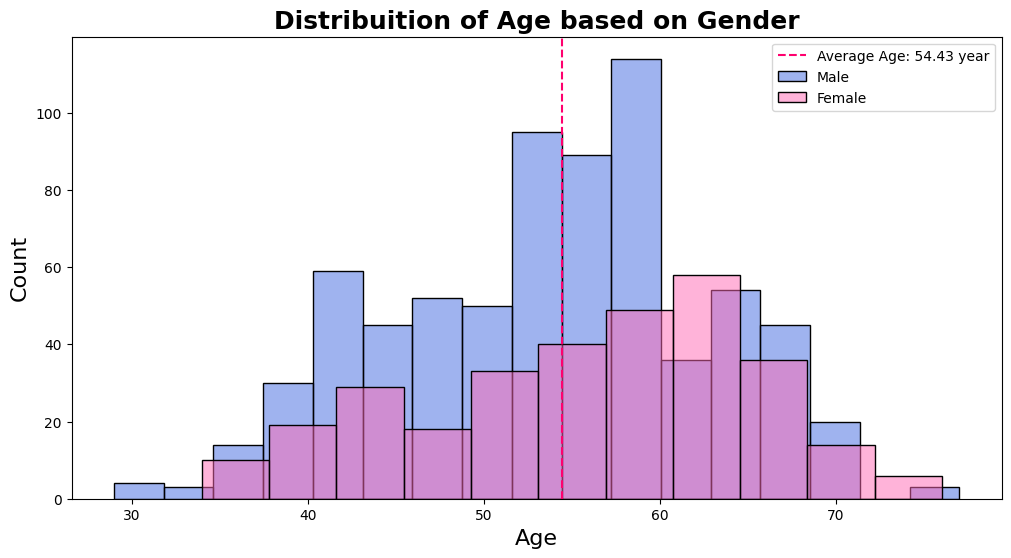

In [32]:
average_age = np.mean(df['Age'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Age based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Age'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Age'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_age, color='#ff006e', linestyle='--', label=f'Average Age: {average_age:.2f} year')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

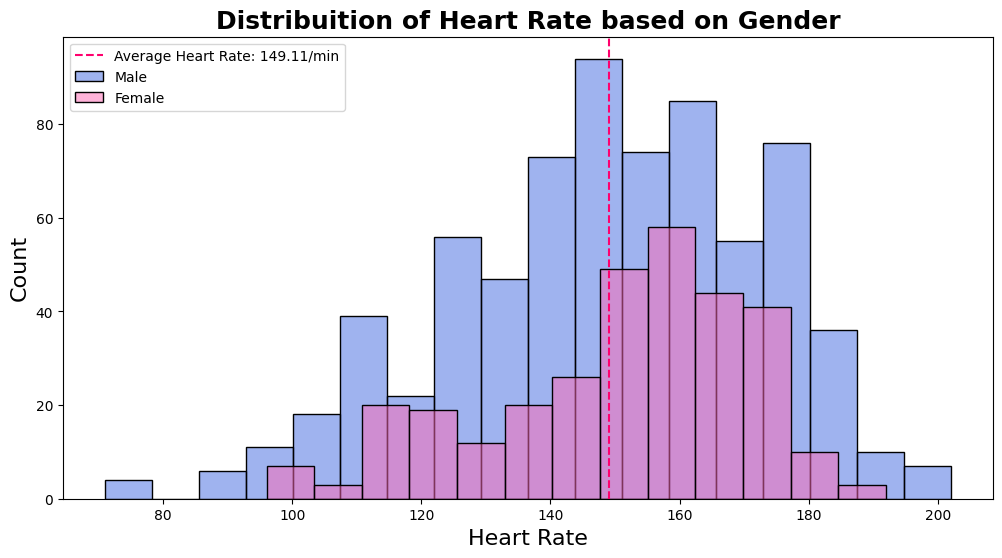

In [33]:
average_hr = np.mean(df['Max_Heart_Rate'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Heart Rate based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Max_Heart_Rate'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Max_Heart_Rate'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_hr, color='#ff006e', linestyle='--', label=f'Average Heart Rate: {average_hr:.2f}/min')
plt.xlabel('Heart Rate', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

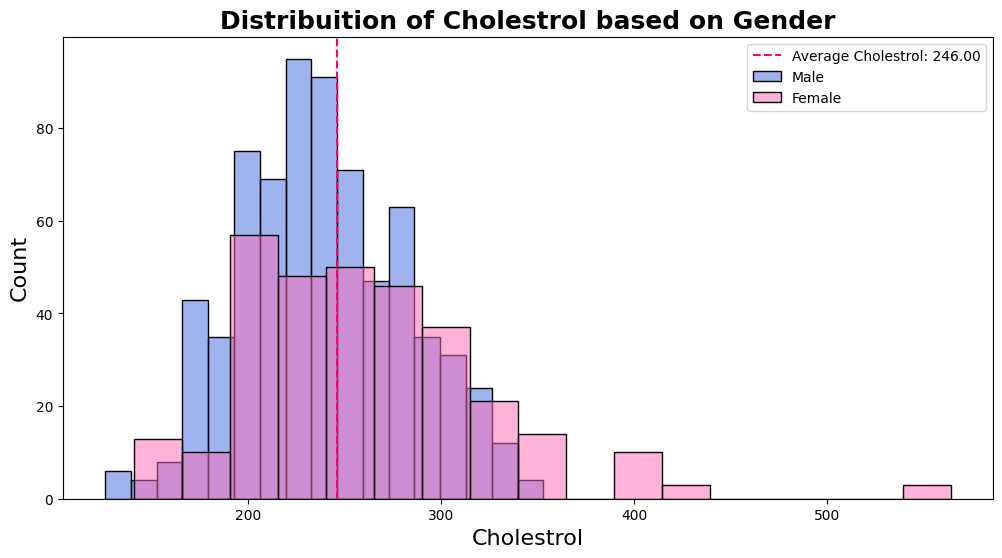

In [34]:
average_chol = np.mean(df['Cholestrol'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Cholestrol based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Cholestrol'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Cholestrol'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_chol, color='#ff006e', linestyle='--', label=f'Average Cholestrol: {average_chol:.2f}')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

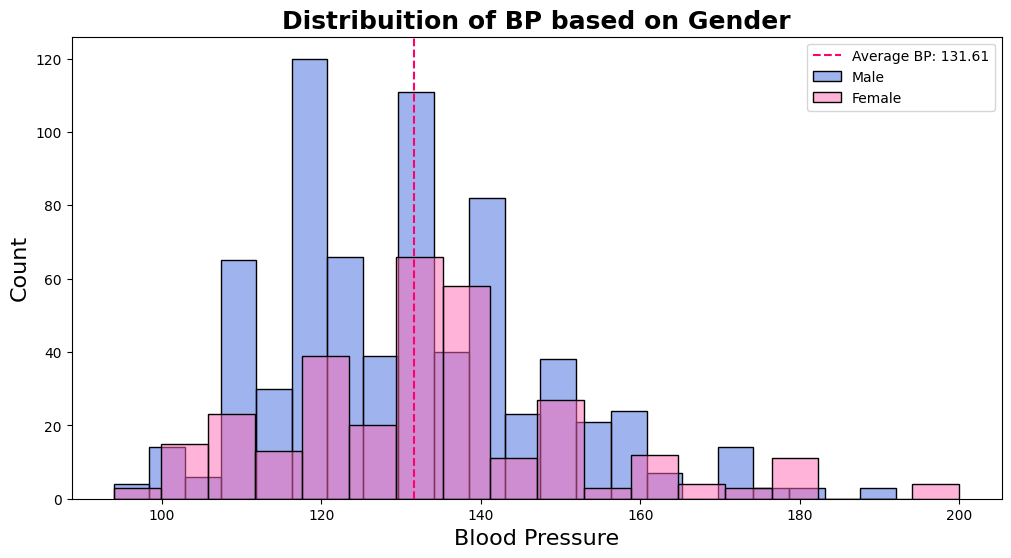

In [35]:
average_bp = np.mean(df['Resting_BP'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of BP based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Resting_BP'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Resting_BP'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_bp, color='#ff006e', linestyle='--', label=f'Average BP: {average_bp:.2f}')
plt.xlabel('Blood Pressure', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

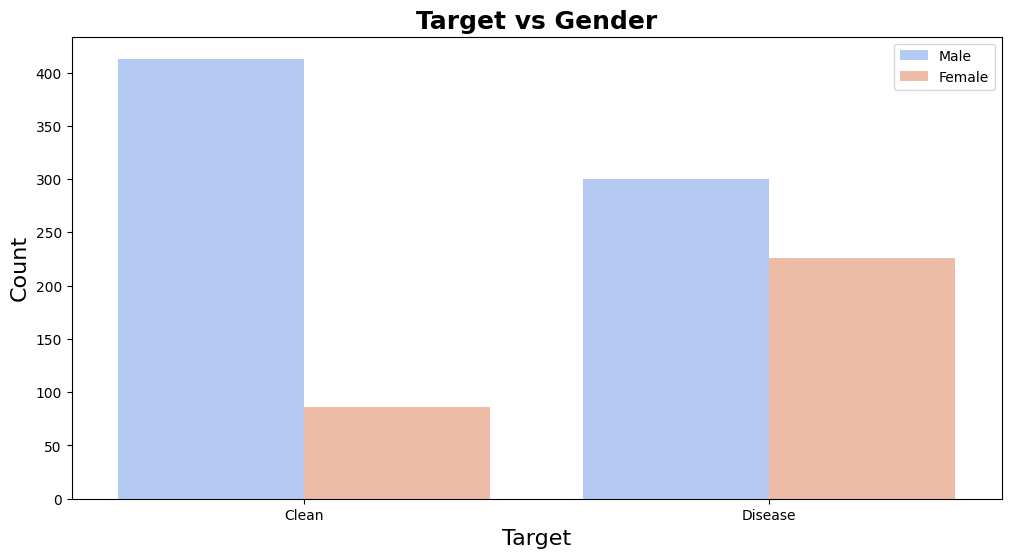

In [36]:
plt.figure(figsize=(12,6))
plt.title('Target vs Gender', fontsize=18, fontweight='bold')
sns.countplot(x=df['Target'], hue=df['Sex'], palette='coolwarm')
plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

<Axes: >

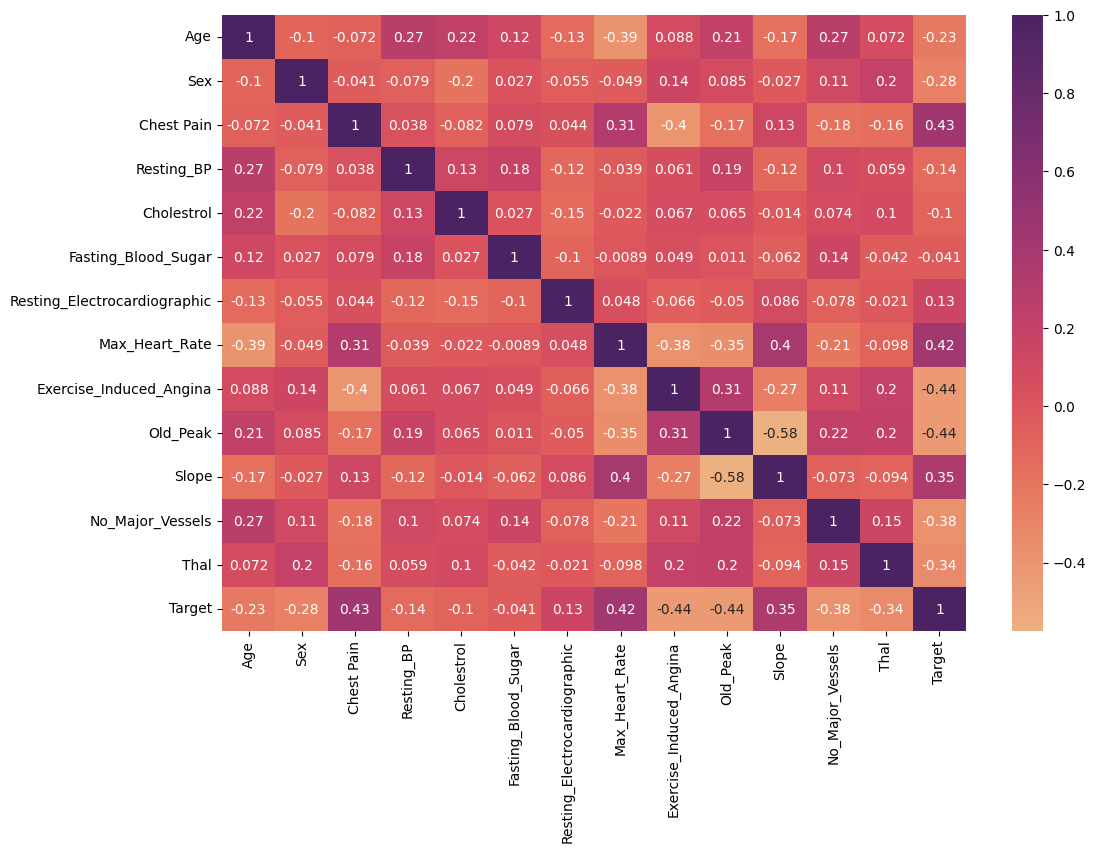

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), square=False, cmap='flare', annot=True)

# Machine Learning

### Splitting into Features and Traget

In [38]:
# Creating Features (X) and Target (y) variables
X = data.drop(['Target'], axis=1)
y = data['Target']

### Finding Best Features for Model

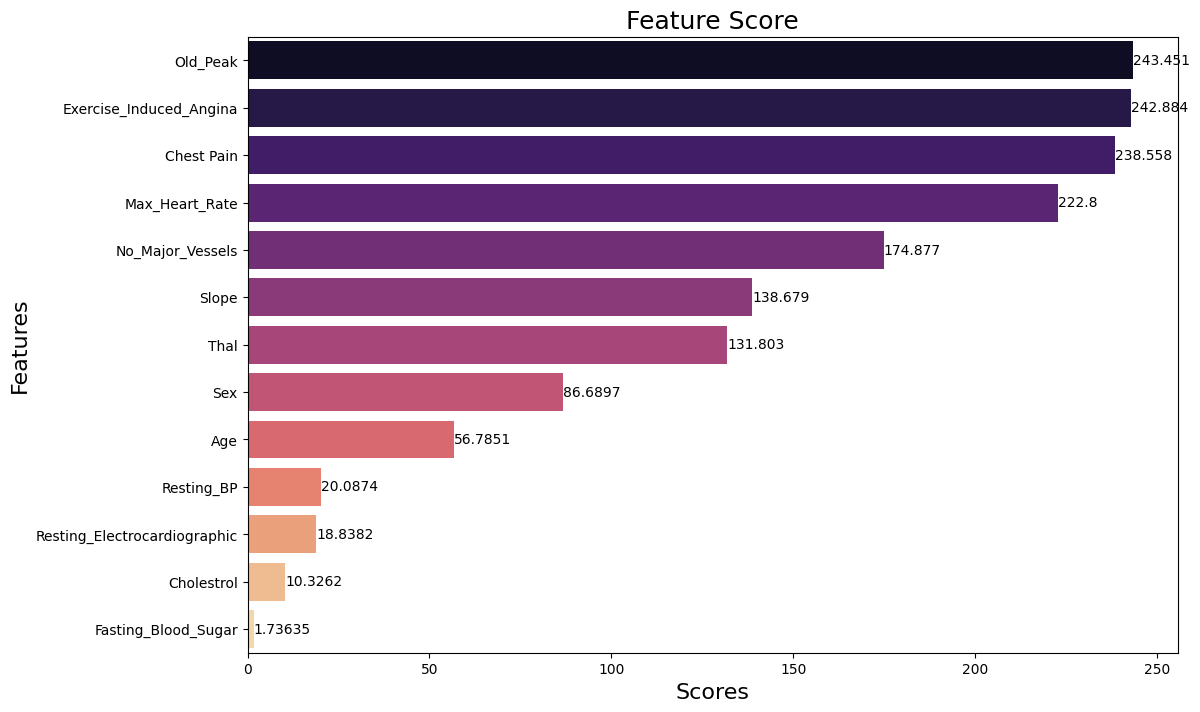

In [39]:
# Find out the best features for the model out of all features.

## Initializing SelectKBest class for finding features and applying on X and y variables
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X,y)

## Creating list of all the columns and their score in variables
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

## Creating a New Dataframe to store features and their scores
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

## Sort the created dataframe in descending order
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

## Plot a barplot to for better understanding of the features and scores
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')
plt.title('Feature Score', fontsize=18)
plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

### Features Transformation

In [35]:
# Dropping the low scored features 
X = X.drop(['Resting_BP', 'Resting_Electrocardiographic', 'Cholestrol', 'Fasting_Blood_Sugar'], axis=1)

In [40]:
# Storing all columns name in a variable
col = X.columns

# Initializing the Standard Scaler
sc = StandardScaler()

X[col] = sc.fit_transform(X[col])
X.head()

,Age,Sex,Chest Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,No_Major_Vessels,Thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


### Train Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating Model

In [42]:
# Initializing the KNeighborsClassifier class
knn = KNeighborsClassifier()

# Creating Params for our class
params_knn = {'n_neighbors':[1,3,5,7,9,11], 'metric': ['euclidean', 'manhattan', 'chebyshev']}

# Running the model with GridSearchCV class
grid_knn = GridSearchCV(knn, params_knn, cv=6, n_jobs=-1)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

### Predicting the Result

In [43]:
# Selecting Best Model
best_knn_model = grid_knn.best_estimator_

# Predicting the result using Best Model
y_pred_knn = best_knn_model.predict(X_test)

### Evaluting the Model on Test Data

In [44]:
print(f'Accuracy Score for {best_knn_model}: ' , accuracy_score(y_test,y_pred_knn))

Accuracy Score for KNeighborsClassifier(metric='euclidean', n_neighbors=1):  0.9853658536585366


In [45]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(95.72222222222221, 0.5, 'Actual Value')

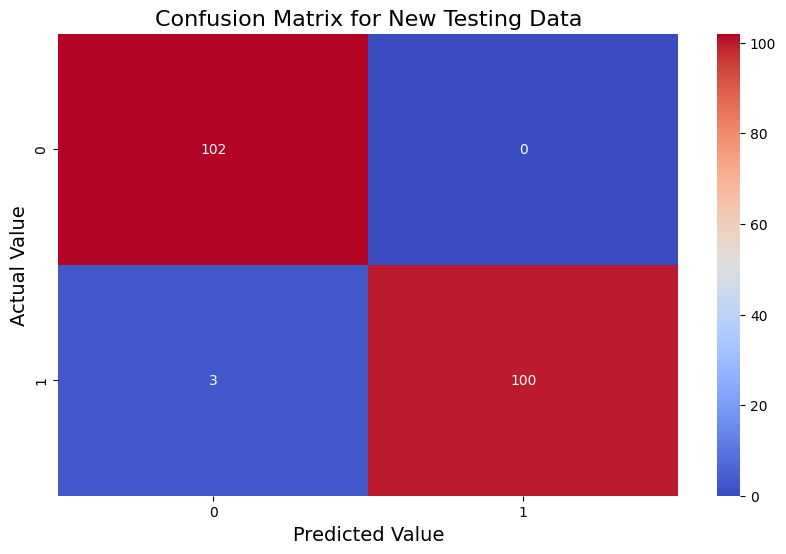

In [46]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

### Evaluting Model on New Synthetic Data

In [55]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 526), (1, 526)]


In [56]:
pred_y_knn = best_knn_model.predict(X_resampled)

print(f'Accuracy Score for {best_knn_model}: ' , accuracy_score(y_resampled,pred_y_knn))

Accuracy Score for KNeighborsClassifier(metric='euclidean', n_neighbors=1):  0.997148288973384


Text(95.72222222222221, 0.5, 'Actual Value')

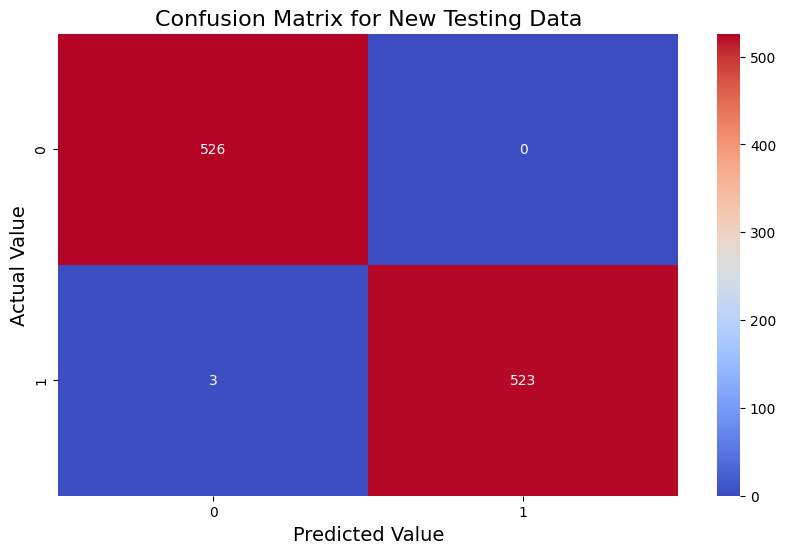

In [57]:
cm1 = confusion_matrix(y_resampled, pred_y_knn)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [59]:
import pickle

In [61]:
filename = 'heart_disease_model.sav'
pickle.dump(best_knn_model, open(filename, 'wb'))

In [62]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

# Summary

1. The Data in hand has 1025 rows and 14 columns.

2. 13 out of 14 columns is integer type and 1 column is float type.

3. We have to rename columns because of our understanding and consistency.

4. We make a copy of the data. Since the dataset has columns in integer and float datatype it will be very helpful for Machine Learning.
5. In the copied dataset we used `Male` and `Female` instead of `0` and `1` for Sex column and `Clean` and `Disease` for Target column.
6. The maximum number of patients lies between 55-75 age and the average age is 54.43. year.
7. Male patients are almost 2 times more than females.
8. Type-0 chest pain is more common in patients and after that, Type-2 comes in second number.
9.  Most patient's BP falls under 110-130 which is somewhat normal and the average BP is 131.61.
10. Cholesterol falls between 200-300 which is not very healthy but not as bad as 400-500 and the average cholesterol is 246.
11. Almost 85% of patients do not have Fasting Blood Sugar.
12. Resting Electrocardiographic results 0 and 1 are very much the same but result 2 is almost invisible in front of the other two results.
13. Almost 63% of patients have a max heart rate between 130-170 and the average heart rate is 149.11/min.
14. 33% of patients have exercise-induced angina.
15. Almost 50% of patients are free of ST depression.
16. Our target is pretty much balanced with 48% of Clean patients and 52% of Disease patients.
17. I will use `SelectKBest` method for finding best features for our model and plot it to get a better understanding of our top features.
18. After finding best features we will remove unnecessary features and scale the data using `StandardScaler`.
19. I will use 20% of the data as `Test Data` after splitting data using `traintestsplit`.
20. Choosing KNN is my preference as `Logistic Regression` is a choice but not good for this case and Other models can be used but I haven't. I have used `GridSearchCV` to find best model using different params.
21. After fitting and predicting the result using our Best Model which has `n_neighbors=1` and `distance=euclidean` let's evalute the model on `Test Data`.
22. The accuracy for the model is 1 which might not be correct so let's check the recall, precision, and f1-score which is also 1. 
23. The model prediction is 100% correct which can be deceiving so I have created a synthetic data using `RandomOverSampler`. This new data has 1072 data points 526 each for `clean` and `disease` category. And after using the model on this data is still 100% correct.

#### *This is very much shocking and exciting too.*